
# Project: Investigate a Dataset - Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The data being analyzed in this project is the Medical Appointment No shows data. <br>
The data contains information of 100k medical appointments in Brazil and its aim is to characterize appointment reporting habits of patients. There are several factors which form the variables in the dataset thought to affect ho patients report for appointments. They include: <br>
<ul>
    <li>Schedule day</li>
    <li>Neighborhood</li>
    <li>Scholarship</li>
    <li>Gender</li>
    <li>Age</li>
</ul>

### Question(s) for Analysis
<ol>
    <li>Is there any relationship between showing up and gender </li>
    <li>Is there any relationship between showing up and age </li>
    <li>What is the relationship between showing up and disease type </li>
    <li>Does scholarship/insurance affect how patients show up for appointments </li>
</ol>
    

In [1]:
# packages to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


In [2]:
#loading the data and displaying the first five rows
df=pd.read_csv("KaggleV2-May-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The data has been correctly loaded into the panda dataframe with correct labels

In [3]:
#lets us check information about the dataset and scan for any null data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
#descriptive summary statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From the summary statistics above we can see that the oldest person is 115 years. <br>
Majority of the patients are young with a mean age value of 37 years. <br>

In [5]:
#let us check the number of rows and columns using the shape method
df.shape

(110527, 14)

As we can see the data has 110,527 rows with 14 columns

In [6]:
#we now need to check the number of null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

None of the rows/columns has any missing values. The data is complete.

In [7]:
#next we check for duplicates
sum(df.duplicated())

0

There is no duplicated data in our dataset.<br>
The data Appears to be in a very good state <br>


### Data Cleaning

 

In [8]:
#Let us do some data type conversions for ScheduledDay and AppointmentDay. They both need to be data type
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [9]:
#lets confirm the changes have taken effect
df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

We were successful in converting the ScheduleDay and AppointmentDay data types from object to datetime as they should be. 

In [10]:
#some age values are zero and that will affect our analysis later on. We would like to replace the zero values with 1year.
df['Age'].replace(0,1,inplace=True)
df.query('Age == 1').head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29 08:08:43+00:00,2016-04-29 00:00:00+00:00,1,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27 10:46:12+00:00,2016-04-29 00:00:00+00:00,1,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25 13:28:21+00:00,2016-04-29 00:00:00+00:00,1,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27 10:48:50+00:00,2016-04-29 00:00:00+00:00,1,CONQUISTA,0,0,0,0,0,0,No
66,9.784893e+14,5638604,M,2016-04-29 08:12:27+00:00,2016-04-29 00:00:00+00:00,1,CONQUISTA,0,0,0,0,0,0,No


In [11]:
#as i was analyzing downstream i discovered an age value that was negative and needed to be corrected. 
df['Age'].replace(-1,1,inplace=True)
df.query('Age == -1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


It has come to my attention that some Age values are zero and cannot fall into any of the bins created.<br>
The zero values in the Age column will be replaced by 1 years. I am assuming those were new borns and i will create a new bin for new borns<br>

Negative ages have also been dealt with <br>

<a id='eda'></a>
## Exploratory Data Analysis



Let us explore the data further.<br>
We would like to check, through heatmaps, the relationship between age hipertension,Diabetes and healthcare insurance (Scholarship)

In [12]:
def constructHeatMap(table,colormap,xlabel,title):
    import seaborn as sns;
    plotted=sns.heatmap(table,cmap=colormap,xticklabels=[0,1]);
    plt.xlabel(xlabel);
    plt.title(title);
    plt.show();
    return plotted;

In [13]:
def constructPivotTable(Disease,Age,Insurance):
    testColumns=df[[Disease,Age,Insurance]]
    groupedbyResult=testColumns.groupby([Disease,Insurance],as_index=False).mean()
    pivotTable=groupedbyResult.pivot(index=[Insurance],columns=[Disease])
    return pivotTable

In [14]:
tableDiabetes=constructPivotTable("Diabetes","Age","Scholarship")
tableDiabetes

Age           
Diabetes             0          1
Scholarship                      
0            35.887433  62.132493
1            29.465410  51.523726

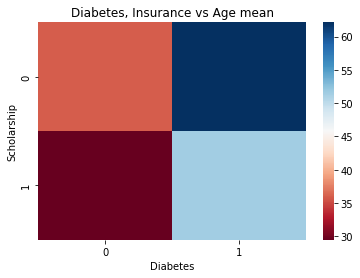

In [15]:
constructHeatMap(tableDiabetes,"RdBu","Diabetes","Diabetes, Insurance vs Age mean");

From the pivot table constructed and the Heatmap above, we can see that people :
<ol>
    <li> Without Diabetes and Without Insurance have an average of 35 years</li>
    <li> With Insurance but without Diabetes have an average of 29 years </li>
    <li> With Diabetes but without Insurance have an average of 62 years </li>
    <li> With diabetes and with Insurance have an average of 51 years </li>
</ol>

In [16]:
tableHipertension=constructPivotTable("Hipertension","Age","Scholarship")
tableHipertension

Age           
Hipertension          0          1
Scholarship                       
0             31.888839  61.614952
1             26.548179  50.027601

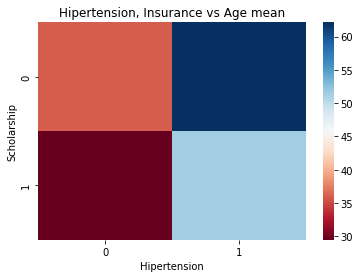

In [17]:
constructHeatMap(tableDiabetes,"RdBu","Hipertension","Hipertension, Insurance vs Age mean");

From the pivot table constructed and the Heatmap above, we can see that people :
<ol>
    <li> Without Hipertension and Without Insurance have an average of 31 years</li>
    <li> With Insurance but without Hipertension have an average of 26 years </li>
    <li> With Hipertension but without Insurance have an average of 61 years </li>
    <li> With Hipertension and with Insurance have an average of 50 years </li>
</ol>

### 1. Is there any relationship between showing up and Gender

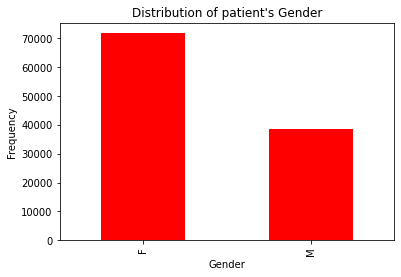

In [18]:
#lets us get some data plots to visualize some of the data effectively
df.Gender.value_counts().plot(kind="bar",color="r");
plt.ylabel("Frequency");
plt.xlabel("Gender");
plt.title("Distribution of patient's Gender");

The number of female patients is about 70000 while the number of male patients is about half that of the females.<br>
It could be possible to conclude that few men seek medical attention <br>

In [19]:
#let us group our data by gender and look at the No-show column to get more insights
df.groupby('Gender')['No-show'].value_counts()

Gender  No-show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
Name: No-show, dtype: int64

In [32]:
#a plot of the gender and No-show column
def plotBar(Gender,Show):
    df.groupby('Gender')['No-show'].value_counts().plot(kind="bar");
    plt.ylabel("Number of patients");
    plt.xlabel("Gender,No-show");
    plt.title("Number of patients and No show per respective Gender");

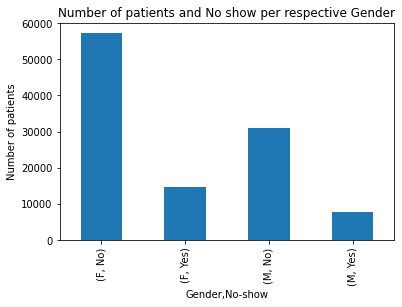

In [33]:
plotBar('Gender','No-show')

In [21]:
#lets get the rations
print("The female No show/show is ",57246/14594," while the males ratio is ",30962/7725)

The female No show/show is  3.922570919555982  while the males ratio is  4.008025889967637


From the groupby method we can see that 57246 women do not show up forappointments while 14594 of them show up for appointments.
As for men, 30,962 of them do not show up for appointments while 7725 of them do. 

### 2. Is there any relationship between showing up and age

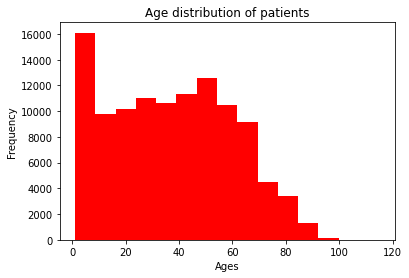

In [22]:
style='ggplot'
df.Age.plot(kind="hist",color="r",bins=15);
plt.title("Age distribution of patients");
plt.xlabel("Ages");
plt.ylabel("Frequency");

From the distribution graph above we can see that patients ranging from the age of 0 to 10 years are many but those from 20 to 70 form the majority of patients. There is then a decline in patients 70 years and above.

In [23]:
#lets get a descriptive analysis of the Age column
df.Age.describe()

count    110527.000000
mean         37.120912
std          23.059403
min           1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [24]:
#lets split the ages into bins and create a column for  easier age bracket grouping
bins=[0,5,18,60,115]

In [25]:
df["Age_Bracket"] = pd.cut(df['Age'],bins, labels=["Babies","Kids","Adults","Elderly"])

In [26]:
df[['Age','Age_Bracket']].head(10)

,Age,Age_Bracket
0,62,Elderly
1,56,Adults
2,62,Elderly
3,8,Kids
4,56,Adults
5,76,Elderly
6,23,Adults
7,39,Adults
8,21,Adults
9,19,Adults


In [27]:
#let us check for any null values in the newly created column
df[df.Age_Bracket.isnull()].head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Age_Bracket


In [28]:
AgeShowValue=df.groupby('Age_Bracket')['No-show'].value_counts()
AgeShowValue

Age_Bracket  No-show
Babies       No          9547
             Yes         2185
Kids         No         12973
             Yes         4162
Adults       No         48932
             Yes        12966
Elderly      No         16756
             Yes         3006
Name: No-show, dtype: int64

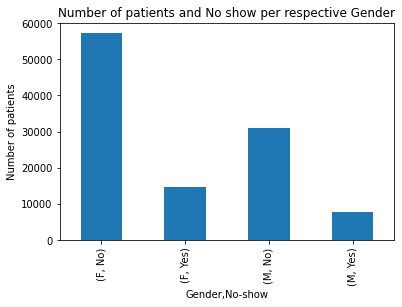

In [34]:
#let us plot this data to visualize it effectively
plotBar('Age_Bracket','No-show')

The age column was split into four bins 
<ol>
    <li>Babies -  Represents the ages 0 - 5 years </li>
    <li> Kids - Represents the ages of 5 - 18 years </li>
    <li>Adults - Represents the ages of 19 - 60 </li>
    <li> Elderly - Represents the ages of 61 - 115 years </li></ol>

In [30]:
print("The Babies No show/show ratio is ",(9547/2185),",the Kids ratio is ",12973/4162,",the adults ratio is ",48932/12966,",the Elderly ratio is ",16756/3006)

The Babies No show/show ratio is  4.369336384439359 ,the Kids ratio is  3.1170110523786643 ,the adults ratio is  3.773870121857165 ,the Elderly ratio is  5.574184963406521


<a id='conclusions'></a>
## Conclusions
<ul>
    <li>There are more female patients compared to male patients by a very large margin(double).</li>
    <p>Despite their large numbers, female patients have a lower No-show/Show ratio compared to their male counterparts. </p>
    <p>This means that male patients have a tendency of not seeking medical attention and even when they seek it they have a higher probability of not showing up to appointments compared to females</p>
    <li>Age is an important determinant of appointment show up.</li>
    <p> Adults (19 -60 years) have the highest no-show tendency compared to all other Age-Brackets.</p>
    <p> However when the ratios of No-show to show are calculated. The elderly have the higherst no-show ratio of 5.57 followed closely by Babies", Adults and Kids respectively </p>
    <p>Elders and Babies are the most valnurable Age_bracket of people yet they do not show up for Appointments which is very alarming </p>
</ul>   

<p>From the above insights it is important to look further into the issues limiting the Appointment show up for the vulnarable groups i.e., babies and elderly </p>
<p>The data did not provide household income data which would have been very good determinant of appointment no-shows</p>
